<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Оценим-параметры-датасета" data-toc-modified-id="Оценим-параметры-датасета-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Оценим параметры датасета</a></span></li><li><span><a href="#Проверим-взаимосвязь-данных" data-toc-modified-id="Проверим-взаимосвязь-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверим взаимосвязь данных</a></span></li><li><span><a href="#Оценим-выборку-по-10-населённым-пунктам-с-наибольшим-числом-объявлений." data-toc-modified-id="Оценим-выборку-по-10-населённым-пунктам-с-наибольшим-числом-объявлений.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Оценим выборку по 10 населённым пунктам с наибольшим числом объявлений.</a></span></li><li><span><a href="#Проанализируем-полученную-нами-выборку" data-toc-modified-id="Проанализируем-полученную-нами-выборку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проанализируем полученную нами выборку</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Для этого нам нужно выполнить следующие шаги:
1. Изучить данные
2. Произвести предобработку данных
3. Произвести анализ данных
4. Сделать вывод по проделанной работе

## Изучение данных из файла

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что в датасете неправильный разделитель, исправим. После чего соберем основную информацию.

In [55]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Видим, что имеются пропущенные значения, тип некоторых столбцов не совпадает с описанием данных. Начнем исправлять.

In [56]:
 data.isna().sum()/data.shape[0]# посчитаем доли пропусков в нашем датасете

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

## Предобработка данных

In [57]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

Можем заполнить пропуски в столбце *balcony* нулями, т.к. на месте пропусков скорее всего просто нет балконов. Аналогично поступим с *parks_atound3000* и *ponds_around3000*.

In [58]:
data = data.dropna(subset=['floors_total'])

Пропуски в *floors_total* составляют малый процент, поэтому можем избавиться от них.

In [59]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['last_price'] = data['last_price'].astype('int')

Столбец *is_apartment* значится булевым в описании данных, поэтому исправим его. Столбец *last_price* привет к целочисленному типу, отбросив несущественную дробную часть.

## Расчёты и добавление результатов в таблицу

In [60]:
#Добавим в датасет столбец с ценной квадратного метра
data['square_meter_price'] = data['last_price']/data['total_area']#Разделим общую цену на общую площадь
data['square_meter_price'] = data['square_meter_price'].astype('int')

In [61]:
#Добавим столбцы с днем недели, месяцем и годом публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')
data['add_weekday'] = data['first_day_exposition'].dt.weekday
data['add_month'] = data['first_day_exposition'].dt.month
data['add_year'] = data['first_day_exposition'].dt.year


In [62]:
#Объявим функцию определяющую тип этажа, будем справнивать значение из столбца floor и присуждать ему категорию
def floor_type(row):
    floor = row['floor']
    floor_max = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floor_max:
        return 'последний'
    return 'другой'

In [63]:
#Применяем к датасету нашу функцию
data['floor_type'] = data.apply(floor_type, axis=1)

In [64]:
data['living_to_total'] = round(data['living_area']/data['total_area'],3)#Посчитаем отношение жилой площади к общей
data['kitchen_to_total'] = round(data['kitchen_area']/data['total_area'],3)#Посчитаем отношение площади кухни к общей

In [65]:
data.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,add_weekday,add_month,add_year,floor_type,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,2,755.0,NaN,120370,3,3,2019,другой,0.472,0.231
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,True,...,0,NaN,81.0,82920,1,12,2018,первый,0.460,0.272
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,True,...,2,574.0,558.0,92785,3,8,2015,другой,0.612,0.148
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,True,...,3,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,1,48.0,121.0,100000,1,6,2018,другой,0.320,0.410
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,True,...,0,NaN,55.0,95065,0,9,2018,другой,0.474,0.299
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,True,...,0,NaN,155.0,99195,3,11,2017,другой,0.284,0.386
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,True,...,0,NaN,NaN,110544,3,4,2019,другой,NaN,0.264
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,True,...,0,NaN,189.0,87454,2,5,2018,другой,0.465,0.266
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,0,NaN,289.0,88524,6,2,2017,другой,0.715,0.107


### Оценим параметры датасета

Построили гистограммы для следующих параметров: *площадь*, *цена*, *число комнат*, *высота потолков*.

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

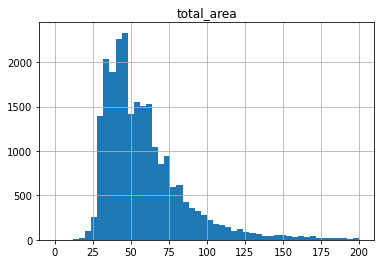

In [66]:
data.hist(column='total_area',bins=50,range=(0,200))
data['total_area'].describe()

Распределение нормальное, с данными все в порядке.

In [125]:
data['last_price'] = data['last_price']/1000000 #переведем ед. измерения столбца из ру в млн руб для удобства

count    23613.000000
mean         6.540555
std         10.901723
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

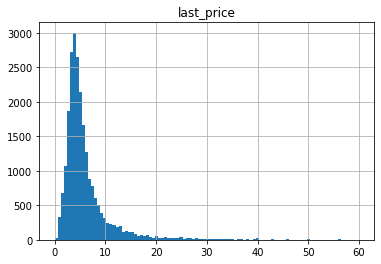

In [133]:
data.hist(column='last_price',bins=100,range=(0,60))
data['last_price'].describe()

Распределение нормальное, однаков  данных наблюдаются выбросы, нужно их убрать.

(0.0, 15.0)

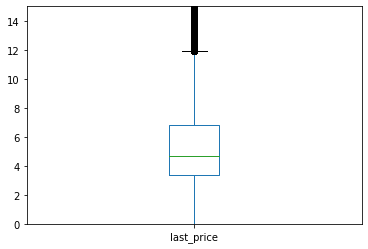

In [136]:
data['last_price'].plot.box()
plt.ylim(0,15)

In [137]:
good_data = data.query('last_price < 13')
good_data['last_price'].describe()

count    21947.000000
mean         4.971072
std          2.411025
min          0.012190
25%          3.349000
50%          4.480000
75%          6.100000
max         12.999000
Name: last_price, dtype: float64

Теперь данные приемлимы для использования в анализе, пойдем дальше.

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

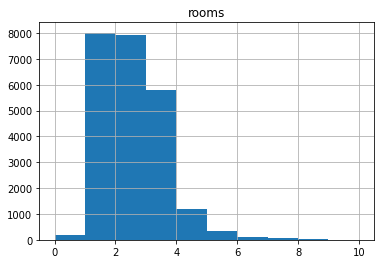

In [164]:
data.hist(column='rooms',range=(0,10))
data['rooms'].describe()

Распределение нормальное, с данными все в порядке.

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

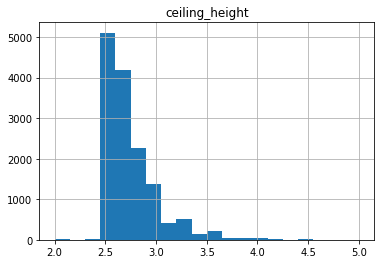

In [163]:
data.hist(column='ceiling_height',bins=20,range=(2,5))
data['ceiling_height'].describe()

Распределение нормальное, однако видим выбросы, и максимальное значение в столбце равное 100, что звучит весьма неправдоподобно.

(0.0, 5.0)

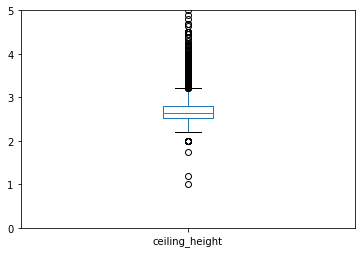

In [143]:
data['ceiling_height'].plot.box()
plt.ylim(0,5)

Оставим значения до 4 метром, т.к. они еще звучат правдоподобно.

In [146]:
good_data = good_data.query('ceiling_height >2 and ceiling_height <= 4')
good_data['ceiling_height'].describe()

count    13293.000000
mean         2.691353
std          0.226853
min          2.200000
25%          2.500000
50%          2.600000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

Избавившись от выбросов, можем перейти дальше.

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

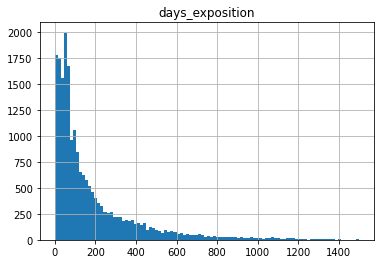

In [162]:
data.hist(column='days_exposition',bins=100,range=(0,1500))
data['days_exposition'].describe()

Видим аномальные значения, однако неясно почему они возникли. Так же наблюдаются выбросы. Построим диаграмму размаха, чтобы оценить выбросы.

(0.0, 600.0)

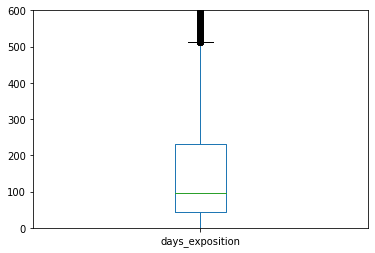

In [142]:
data['days_exposition'].plot.box()
plt.ylim(0,600)

Избавимся от выбросов.

In [72]:
good_data = data.query('days_exposition < 550')
good_data['days_exposition'].describe()

count    18974.000000
mean       132.927901
std        127.647189
min          1.000000
25%         42.000000
50%         86.000000
75%        188.000000
max        549.000000
Name: days_exposition, dtype: float64

### Проверим взаимосвязь данных

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='add_weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='add_month', ylabel='last_price'>,
        <AxesSubplot:xlabel='add_year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='add_weekday', ylabel='total_area'>,
        <AxesSubplot:xlabel='add_month', ylabel='total_area'>,
        <AxesSubplot:xlabel='add_year', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area

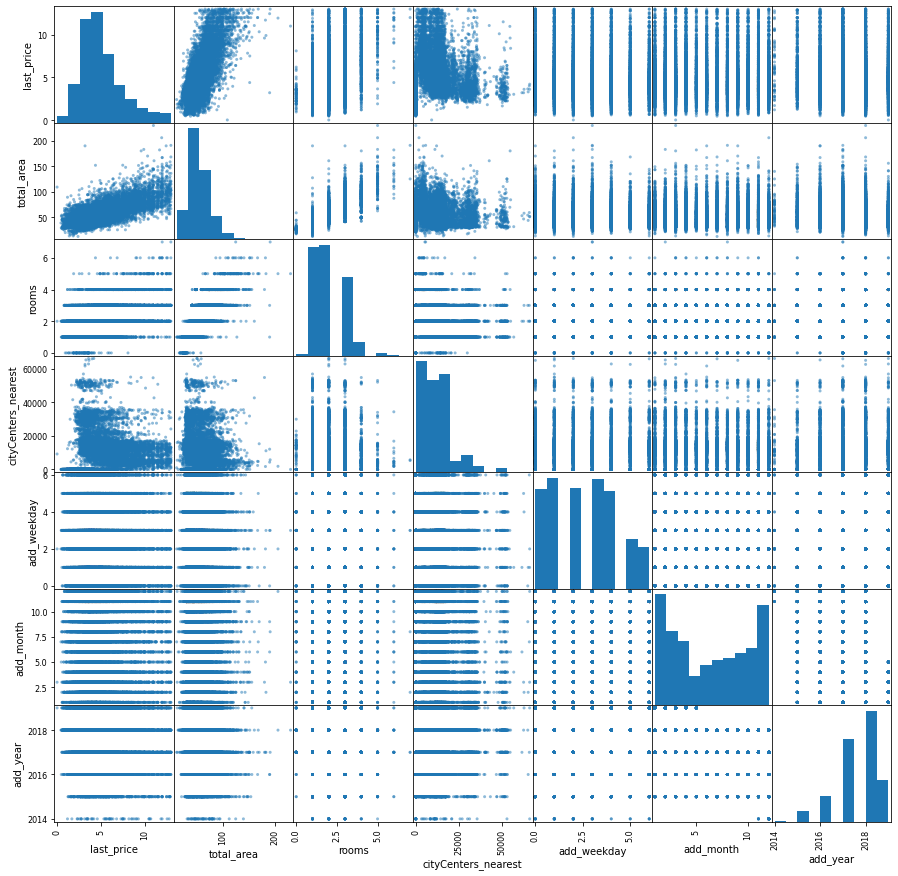

In [147]:
# Выделим необходимые нам данные
corr_data = good_data.loc[:,['last_price','total_area','rooms','cityCenters_nearest','floor_type','add_weekday','add_month','add_year']]
pd.plotting.scatter_matrix(corr_data, figsize=(15, 15)) 

In [148]:
corr_data.corr()# Построим корреляционную матрицу

,last_price,total_area,rooms,cityCenters_nearest,add_weekday,add_month,add_year
last_price,1.000000,0.727393,0.478747,0.047533,-0.028375,0.007540,-0.015669
total_area,0.727393,1.000000,0.801456,-0.049331,-0.022290,0.014752,-0.098812
rooms,0.478747,0.801456,1.000000,-0.035128,-0.003479,0.003561,-0.053200
cityCenters_nearest,0.047533,-0.049331,-0.035128,1.000000,0.003612,-0.022117,0.006064
add_weekday,-0.028375,-0.022290,-0.003479,0.003612,1.000000,-0.008331,-0.000999
add_month,0.007540,0.014752,0.003561,-0.022117,-0.008331,1.000000,-0.298538
add_year,-0.015669,-0.098812,-0.053200,0.006064,-0.000999,-0.298538,1.000000


Видим, что наблюдается сильная зависимость *last_price* от *total_area* и *rooms*. Чем больше параметры соотвествующих столбцов, тем выше будет цена. Действительно, такую зависимость легко увидеть и в жизненном опыте.

In [ ]:
year_data = corr_data.pivot_table(index='add_year',values='last_price')
year_data.plot()

С 2016 по 2018 наблюдается падение цены.

<AxesSubplot:xlabel='add_month'>

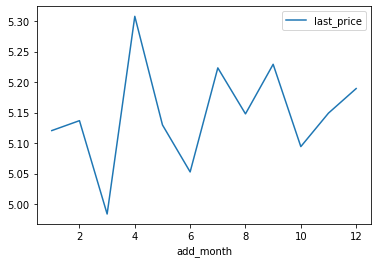

In [150]:
# Оценим отдельно параметр month
month_data = corr_data.pivot_table(index='add_month',values='last_price')
month_data.plot()

Лучшие цены наблюдается в *апреле*, *июле*, *августе* и *сентябре*. Самая лучшая цена в *апреле*. Видим очень резкое падение цены с апреля по июнь

<AxesSubplot:xlabel='add_weekday'>

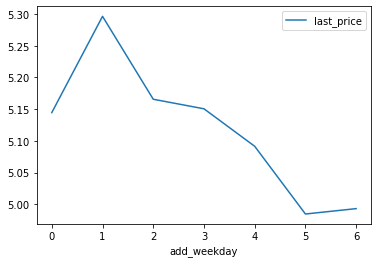

In [151]:
# Оценим отдельно параметр weekday
weekday_data = corr_data.pivot_table(index='add_weekday',values='last_price')
weekday_data.plot()

Лучшие цены мы наблюдаем в начале неделе, после среды цена неустанно падает.

In [152]:
# Оценим отдельно параметр floor
floor_data = corr_data.pivot_table(index='floor_type',values='last_price',aggfunc='mean')
floor_data

,last_price
floor_type,
другой,5.337188
первый,4.403226
последний,4.851037


Видим, что *первый* первый этаж самый дешевый, в то время как *другой* - самый дорогой. Различия между первым и последним этажом не так уж велики.

### Оценим выборку по 10 населённым пунктам с наибольшим числом объявлений.

In [154]:
#Сделаем сводную таблицу по названием городов
locality_pivot_table = good_data.pivot_table(index='locality_name', values='last_price', aggfunc=['count','mean'])
locality_pivot_table.columns = ['count','mean']
locality_pivot_table = locality_pivot_table.sort_values(by='count',ascending=False)# Отсортируем таблицу
locality_pivot_table = locality_pivot_table[:10]
display(locality_pivot_table)
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,8960,5.935839
Всеволожск,270,3.834393
посёлок Шушары,216,4.257802
Пушкин,216,5.350554
Колпино,203,3.960373
посёлок Мурино,198,4.003214
Гатчина,147,3.557926
Петергоф,142,4.220451
посёлок Парголово,137,4.518657


,count,mean
locality_name,,
Санкт-Петербург,8960,5.935839


,count,mean
locality_name,,
Гатчина,147,3.557926


Выделим из этой таблицы данные по Санкт-Петербургу.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

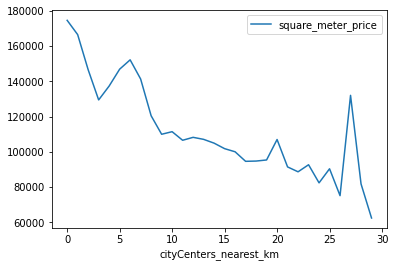

In [155]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_pivot_data = spb_data.pivot_table(index='cityCenters_nearest_km', values='square_meter_price')
spb_pivot_data.plot()

Будем считать за радиус от центра 6 км.

### Проанализируем полученную нами выборку

,last_price,total_area,rooms,cityCenters_nearest_km,add_weekday,add_month,add_year
last_price,1.000000,0.597932,0.299511,-0.051215,0.029515,-0.008432,-0.036545
total_area,0.597932,1.000000,0.741246,-0.040748,0.011780,-0.021474,-0.071135
rooms,0.299511,0.741246,1.000000,-0.075535,-0.005169,-0.033527,-0.057591
cityCenters_nearest_km,-0.051215,-0.040748,-0.075535,1.000000,-0.037069,0.011718,-0.035848
add_weekday,0.029515,0.011780,-0.005169,-0.037069,1.000000,0.031863,-0.003653
add_month,-0.008432,-0.021474,-0.033527,0.011718,0.031863,1.000000,-0.243236
add_year,-0.036545,-0.071135,-0.057591,-0.035848,-0.003653,-0.243236,1.000000


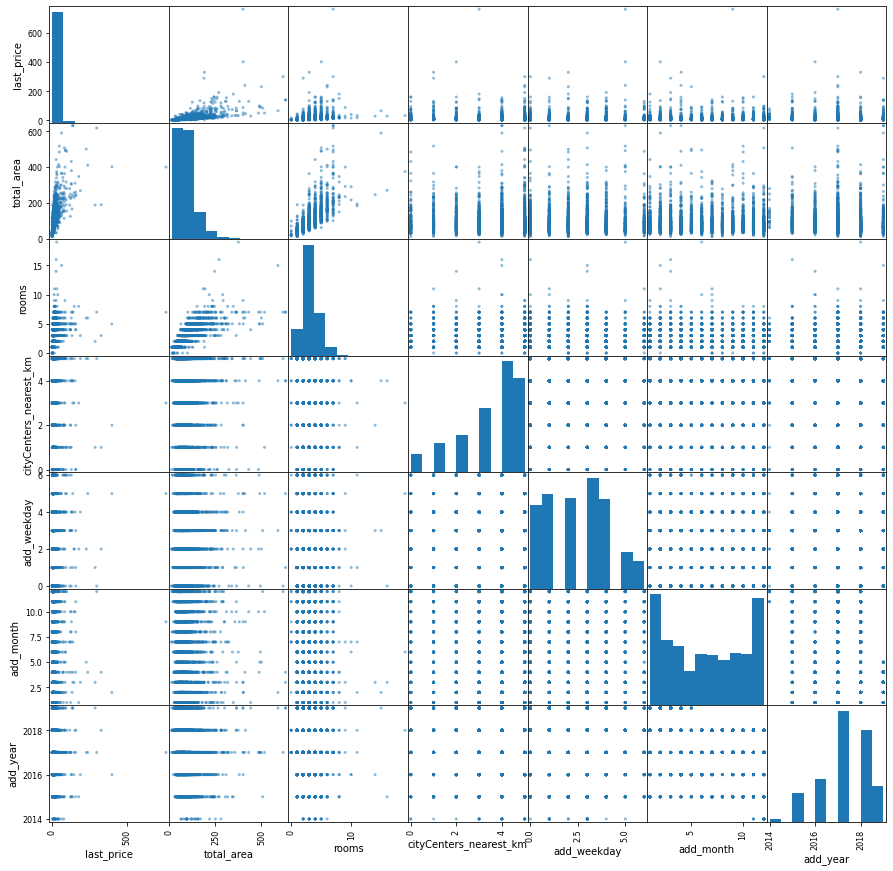

In [175]:
corr_central_spb_data = spb_data.query('cityCenters_nearest_km < 6')
corr_central_spb_data = corr_central_spb_data.loc[:,['last_price','total_area','rooms','floor_type','cityCenters_nearest_km','add_weekday','add_month','add_year']]
pd.plotting.scatter_matrix(corr_central_spb_data, figsize=(15, 15)) 
corr_central_spb_data.corr()

Согласно данной матрице *last_price* так же зависит от параметра *total_area*, хотя зависимость от параметра *rooms* более слабая.

In [168]:
corr_central_spb_data['last_price'].describe()

count    2888.000000
mean       15.071607
std        25.404998
min         1.600000
25%         6.900000
50%         9.460000
75%        14.551250
max       763.000000
Name: last_price, dtype: float64

<AxesSubplot:xlabel='add_year'>

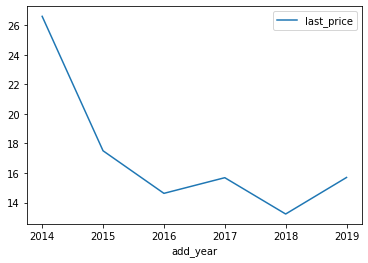

In [158]:
year_spb_data = corr_central_spb_data.pivot_table(index='add_year',values='last_price')
year_spb_data.plot()

Наблюдается та же ситуация, что и с основными данными, однако с 2016 по 2017 цена выросла.

<AxesSubplot:xlabel='add_weekday'>

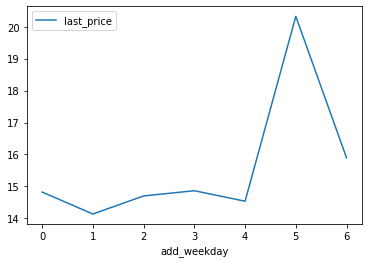

In [167]:
weekday_spb_data = corr_central_spb_data.pivot_table(index='add_weekday',values='last_price')
weekday_spb_data.plot()

Ситуация абсолютно противоположная основным данным, видим, что тут цена растет ближе к концу недели, хотя и резко обваливается в воскресенье.

<AxesSubplot:xlabel='add_month'>

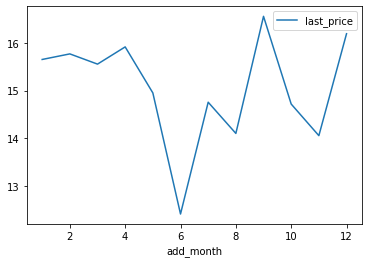

In [160]:
month_spb_data = corr_central_spb_data.pivot_table(index='add_month',values='last_price')
month_spb_data.plot()

Примерно та же ситуация, что и с основными данными. Однако начало года более стабильное: цена не претерпевает существенных изменений. Лучшре значение так же в сентябре, хотя пиковое значение так же наблюдается в декабре

In [161]:
floor_spb_data = corr_central_spb_data.pivot_table(index='floor_type',values='last_price')
floor_spb_data

,last_price
floor_type,
другой,14.968357
первый,9.488535
последний,18.948599


В отличие от основных данных *последний* и *другой* этажи имеют практически одинаковую цену, хотя *первый* так же дешевле. Самое больше значение так же у *последнего* этажа, а не у *другого*.

## Общий вывод

Избавились от аномальных значений в столбце *days_exposition*. Проанализировали взаимосвязь цены со следующими параметрами: *площади*, *числа комнат*, *удалённости от центра*, *даты размещения*, *типа этажа*.
Получили зависимость от *удалённости от центра* и *площади*. Выделили в какие дни недели, месяцы и года, цена падала или росла.

В начале работы мы имели базу данных Я.недвижимость. Мы совершили предобработку данных, избавились от аномальных значений и выбросов. Провели корреляционный анализ, и вот что мы получили в его результате: 

1.Среднее значение цены 4,97 млн. руб., медианное значение - 4.48 млн. руб.

2.Основными параметрами влияющими на цену являются общая площадь и количество комнат. Начиная примерно с 50 кв. м. цена начинает резко расти.

Так же исследовали цену в центре Санкт-Петербурга и сделали следующие выводы:

1.Среднее значение цены 15 млн. руб., медианное значение - 9.46 млн. руб.

2.Основными параметрами влияющими на цену так же являются общая площадь и количество комнат. Цена более равномерна распределена относительно общей площади.

Считали центром все в радиусе 6 км. Видим, что в центре среднее значение цены больше в 3 раза, медианное значение в два.